1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np

# количество наблюдений


X = np.array ([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

n = len(X)

In [2]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X) ** 2)
b

2.620538882402765

In [3]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [4]:
y_hat = 444.177+2.621*X
y_hat

array([535.912, 562.122, 942.167, 968.377, 549.017, 627.647, 585.711,
       837.327, 758.697, 732.487])

In [5]:
y

array([401., 574., 874., 919., 459., 739., 653., 902., 746., 832.])

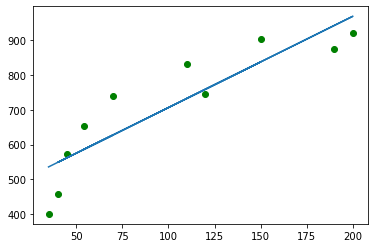

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline



fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(6, 4)
)
plt.scatter(X, y, c='green')
plt.plot(X, 444.177+2.621*X)

plt.show()


In [7]:
from numpy import reshape
import seaborn as sns


# без интерсепта
X=X.reshape ((10, 1))
X

array([[ 35.],
       [ 45.],
       [190.],
       [200.],
       [ 40.],
       [ 70.],
       [ 54.],
       [150.],
       [120.],
       [110.]])

In [8]:
y=y.reshape ((10, 1))
y

array([[401.],
       [574.],
       [874.],
       [919.],
       [459.],
       [739.],
       [653.],
       [902.],
       [746.],
       [832.]])

In [9]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ y) 
B

array([[5.88982042]])

In [10]:
#  с интерсептом

X = np.hstack([np.ones((10,1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [17]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T, y)) 
print(B)

[[444.17735732]
 [  2.62053888]]


2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [18]:
def mse_(B1, y=y, x=X, n=10):
    return np.sum((B1*x-y)**2)/n

In [19]:
alpha = 1e-6 # не поняла откуда взялась альфа, вернее как ее посчитать

In [20]:
B1 = 0.1
n = 10

In [21]:
for i in range(3000):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    print ('B1={}'.format(B1))

B1=0.26094768
B1=0.417460414488064
B1=0.5696604092747625
B1=0.7176665027651146
B1=0.8615942587481212
B1=1.001556056629465
B1=1.1376611791778286
B1=1.2700158978533478
B1=1.3987235557848192
B1=1.5238846484604573
B1=1.6455969021951997
B1=1.7639553504358305
B1=1.8790524079635011
B1=1.9909779430515853
B1=2.09981934763521
B1=2.2056616055472524
B1=2.308587358874077
B1=2.40867697248283
B1=2.506008596770671
B1=2.600658228684936
B1=2.6926997710618767
B1=2.7822050903303124
B1=2.8692440726252424
B1=2.9538846783552395
B1=3.036192995266225
B1=3.1162332900430654
B1=3.194068058489271
B1=3.2697580743239874
B1=3.343362436634375
B1=3.4149386160204274
B1=3.4845424994682612
B1=3.5522284339869135
B1=3.618049269042717
B1=3.682056397824391
B1=3.7442997973710606
B1=3.8048280675945416
B1=3.8636884692263607
B1=3.9209269607191346
B1=3.9765882341311265
B1=4.030715750021996
B1=4.08335177138699
B1=4.134537396656068
B1=4.184312591783731
B1=4.232716221454612
B1=4.2797860794291855
B1=4.325558918053298
B1=4.370070476954

3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [26]:
B1 = 0.1
B0 = 0.1

def mse_(B0, B1, y=y, x=X, n=10):
    return np.sum((B0+B1*x-y)**2)/n

alpha = 5e-5

for i in range(750000):
    y_pred = B0 + B1*X
    B0 -= alpha*(2/n)*np.sum((y_pred-y))
    B1 -= alpha*(2/n)*np.sum((y_pred-y)*X)
    
    if i%30000==0:
        print('Iteration:', i, 'B0=', B0, 'B1=', B1, 'mse=', mse_(B0, B1))


Iteration: 0 B0= 0.24093599999999998 B1= 8.14636 mse= 649311.8913524792
Iteration: 30000 B0= 639.0442400309588 B1= 1.191326239540774 mse= 51425.2347832218
Iteration: 60000 B0= 654.5749055524344 B1= 1.0758864559095296 mse= 51111.511537511564
Iteration: 90000 B0= 654.9524793329106 B1= 1.0730799415677768 mse= 51111.32611168524
Iteration: 120000 B0= 654.9616587180137 B1= 1.0730117109933222 mse= 51111.32600208949
Iteration: 150000 B0= 654.9618818826326 B1= 1.0730100522057269 mse= 51111.32600202471
Iteration: 180000 B0= 654.9618873081025 B1= 1.0730100118780879 mse= 51111.32600202467
Iteration: 210000 B0= 654.9618874400065 B1= 1.073010010897643 mse= 51111.326002024674
Iteration: 240000 B0= 654.9618874428318 B1= 1.0730100108766423 mse= 51111.32600202468
Iteration: 270000 B0= 654.9618874428318 B1= 1.0730100108766423 mse= 51111.32600202468
Iteration: 300000 B0= 654.9618874428318 B1= 1.0730100108766423 mse= 51111.32600202468
Iteration: 330000 B0= 654.9618874428318 B1= 1.0730100108766423 mse= 5111